In [48]:
import pandas as pd
import numpy as np
import os
import re

In [49]:
print("Current working directory: ", os.getcwd())
csv_dir = './stopping_fix/eval_data/'
sygys_grow_file_patterns = '^sygus-\w+_grow\.csv$'
print("Os.listdir: ", os.listdir(csv_dir))

sygus_grow_files = [f for f in os.listdir(csv_dir) if re.match(sygys_grow_file_patterns, f)]

print("Length of sygus_grow_files: ", len(sygus_grow_files))

Current working directory:  /Users/habib/Documents/ags-bee-search/scripts/result_processor_crossbeam
Os.listdir:  ['sygus-50k_nogrow.csv', 'new-50k_8restart_grow.csv', 'new-50k_8restart_nogrow.csv', 'sygus-50k_8restart_nogrow.csv', 'sygus-50k_8restart_grow.csv', 'new-50k_2restart_nogrow.csv', 'new-50k_nogrow.csv', 'sygus-50k_2restart_nogrow.csv', 'sygus-50k_2restart_grow.csv', 'new-50k_4restart_grow.csv', 'sygus-50k_4restart_nogrow.csv', 'new-50k_2restart_grow.csv', 'sygus-50k_4restart_grow.csv', 'new-50k_4restart_nogrow.csv']
Length of sygus_grow_files:  3


In [50]:
print(sygus_grow_files)
df_list = []
for file in sygus_grow_files:
    df = pd.read_csv(csv_dir + file)
    n = file.split('_')[1][0]
    # df.rename(columns={'valuations': 'evaluations'}, inplace=True)
    df.rename(columns={'avg': 'A-Crossbeam'+('('+n+')' if n != 'n' else '')+'_avg'}, inplace=True)
    df.rename(columns={'std': 'A-Crossbeam'+('('+n+')' if n != 'n' else '')+'_std'}, inplace=True)
    df_list.append(df)

['sygus-50k_8restart_grow.csv', 'sygus-50k_2restart_grow.csv', 'sygus-50k_4restart_grow.csv']


In [51]:
for df in df_list:
    print(df.head())

   evaluations  A-Crossbeam(8)_avg  A-Crossbeam(8)_std
0            1                 0.0            0.000000
1          101                 0.0            0.000000
2          201                 1.5            0.577350
3          301                10.2            2.387467
4          401                18.6            2.701851
   evaluations  A-Crossbeam(2)_avg  A-Crossbeam(2)_std
0            1                 0.0            0.000000
1          101                 0.0            0.000000
2          201                 1.5            0.707107
3          301                10.0            2.738613
4          401                18.6            1.816590
   evaluations  A-Crossbeam(4)_avg  A-Crossbeam(4)_std
0            1            0.000000            0.000000
1          101            0.000000            0.000000
2          201            1.333333            0.577350
3          301            9.200000            2.167948
4          401           16.600000            2.073644


In [52]:
# merge the dataframes into one dataframe while evaluations is the key column
df_merged = df_list[0]
for df in df_list[1:]:
    df_merged = pd.merge(df_merged, df, on='evaluations')

print(df_merged.head())

   evaluations  A-Crossbeam(8)_avg  A-Crossbeam(8)_std  A-Crossbeam(2)_avg  \
0            1                 0.0            0.000000                 0.0   
1          101                 0.0            0.000000                 0.0   
2          201                 1.5            0.577350                 1.5   
3          301                10.2            2.387467                10.0   
4          401                18.6            2.701851                18.6   

   A-Crossbeam(2)_std  A-Crossbeam(4)_avg  A-Crossbeam(4)_std  
0            0.000000            0.000000            0.000000  
1            0.000000            0.000000            0.000000  
2            0.707107            1.333333            0.577350  
3            2.738613            9.200000            2.167948  
4            1.816590           16.600000            2.073644  


In [53]:
# Replace NaN with 0
df_merged.fillna(0, inplace=True)
print(df_merged.head())

   evaluations  A-Crossbeam(8)_avg  A-Crossbeam(8)_std  A-Crossbeam(2)_avg  \
0            1                 0.0            0.000000                 0.0   
1          101                 0.0            0.000000                 0.0   
2          201                 1.5            0.577350                 1.5   
3          301                10.2            2.387467                10.0   
4          401                18.6            2.701851                18.6   

   A-Crossbeam(2)_std  A-Crossbeam(4)_avg  A-Crossbeam(4)_std  
0            0.000000            0.000000            0.000000  
1            0.000000            0.000000            0.000000  
2            0.707107            1.333333            0.577350  
3            2.738613            9.200000            2.167948  
4            1.816590           16.600000            2.073644  


In [54]:
# Read files with _nogrow
sygus_nogrow_file_patterns = '^sygus-\w+_nogrow\.csv$'
sygus_nogrow_files = [f for f in os.listdir(csv_dir) if re.match(sygus_nogrow_file_patterns, f)]
print(sygus_nogrow_files)

['sygus-50k_nogrow.csv', 'sygus-50k_8restart_nogrow.csv', 'sygus-50k_2restart_nogrow.csv', 'sygus-50k_4restart_nogrow.csv']


In [55]:
# Read files with _nogrow and merge them into one dataframe
df_list_nogrow = []
for file in sygus_nogrow_files:
    df = pd.read_csv(csv_dir + file)
    n = file.split('_')[1][0]
    # df.rename(columns={'valuations': 'evaluations'}, inplace=True)
    df.rename(columns={'avg': 'Crossbeam'+('(' + n + ')' if n!= 'n' else '')+'_avg'}, inplace=True)
    df.rename(columns={'std': 'Crossbeam'+('(' + n + ')' if n!= 'n' else '')+'_std'}, inplace=True)
    df_list_nogrow.append(df)

In [56]:
# print the head of each dataframe
for df in df_list_nogrow:
    print(df.head())

   evaluations  Crossbeam_avg  Crossbeam_std
0            1            0.0       0.000000
1          101            0.0       0.000000
2          201            1.0            NaN
3          301            8.0       1.224745
4          401           16.4       1.140175
   evaluations  Crossbeam(8)_avg  Crossbeam(8)_std
0            1          0.000000          0.000000
1          101          0.000000          0.000000
2          201          1.333333          0.577350
3          301          9.600000          2.073644
4          401         17.800000          1.643168
   evaluations  Crossbeam(2)_avg  Crossbeam(2)_std
0            1               0.0          0.000000
1          101               0.0          0.000000
2          201               1.0          0.000000
3          301               8.4          0.894427
4          401              16.6          1.341641
   evaluations  Crossbeam(4)_avg  Crossbeam(4)_std
0            1               0.0          0.000000
1          101  

In [57]:
# merge the dataframes into one dataframe while evaluations is the key column
df_merged_nogrow = df_list_nogrow[0]
for df in df_list_nogrow[1:]:
    df_merged_nogrow = pd.merge(df_merged_nogrow, df, on='evaluations')
print(df_merged_nogrow.head())

   evaluations  Crossbeam_avg  Crossbeam_std  Crossbeam(8)_avg  \
0            1            0.0       0.000000          0.000000   
1          101            0.0       0.000000          0.000000   
2          201            1.0            NaN          1.333333   
3          301            8.0       1.224745          9.600000   
4          401           16.4       1.140175         17.800000   

   Crossbeam(8)_std  Crossbeam(2)_avg  Crossbeam(2)_std  Crossbeam(4)_avg  \
0          0.000000               0.0          0.000000               0.0   
1          0.000000               0.0          0.000000               0.0   
2          0.577350               1.0          0.000000               1.5   
3          2.073644               8.4          0.894427               9.0   
4          1.643168              16.6          1.341641              16.0   

   Crossbeam(4)_std  
0          0.000000  
1          0.000000  
2          0.707107  
3          2.738613  
4          2.549510  


In [58]:
# Fill NaN with 0
df_merged_nogrow.fillna(0, inplace=True)
print(df_merged_nogrow.head())

   evaluations  Crossbeam_avg  Crossbeam_std  Crossbeam(8)_avg  \
0            1            0.0       0.000000          0.000000   
1          101            0.0       0.000000          0.000000   
2          201            1.0       0.000000          1.333333   
3          301            8.0       1.224745          9.600000   
4          401           16.4       1.140175         17.800000   

   Crossbeam(8)_std  Crossbeam(2)_avg  Crossbeam(2)_std  Crossbeam(4)_avg  \
0          0.000000               0.0          0.000000               0.0   
1          0.000000               0.0          0.000000               0.0   
2          0.577350               1.0          0.000000               1.5   
3          2.073644               8.4          0.894427               9.0   
4          1.643168              16.6          1.341641              16.0   

   Crossbeam(4)_std  
0          0.000000  
1          0.000000  
2          0.707107  
3          2.738613  
4          2.549510  


In [59]:
# Merge the two dataframes on evaluations
df_merged_all = pd.merge(df_merged, df_merged_nogrow, on='evaluations')
print(df_merged_all.head())

   evaluations  A-Crossbeam(8)_avg  A-Crossbeam(8)_std  A-Crossbeam(2)_avg  \
0            1                 0.0            0.000000                 0.0   
1          101                 0.0            0.000000                 0.0   
2          201                 1.5            0.577350                 1.5   
3          301                10.2            2.387467                10.0   
4          401                18.6            2.701851                18.6   

   A-Crossbeam(2)_std  A-Crossbeam(4)_avg  A-Crossbeam(4)_std  Crossbeam_avg  \
0            0.000000            0.000000            0.000000            0.0   
1            0.000000            0.000000            0.000000            0.0   
2            0.707107            1.333333            0.577350            1.0   
3            2.738613            9.200000            2.167948            8.0   
4            1.816590           16.600000            2.073644           16.4   

   Crossbeam_std  Crossbeam(8)_avg  Crossbeam(8)_s

In [60]:
# Get all column name with _avg at end from the df_marged_all except the first column and add the to a string separated by _
filename = ""
for col in df_merged_all.columns[1:]:
    if col.endswith("_avg"):
        filename += col[:-4] + "_"
filename = filename[:-1]
print(filename)

A-Crossbeam(8)_A-Crossbeam(2)_A-Crossbeam(4)_Crossbeam_Crossbeam(8)_Crossbeam(2)_Crossbeam(4)


In [61]:
# Write the merged dataframe to csv
df_merged_all.to_csv('./eval_data/SyGuS_' + filename + '_evaluations_statistics.csv', index=False)

In [17]:
# Processing for 38B which is new-*_grow.csv and new-*_nogrow.csv files

In [62]:
# Read files with _grow
new_grow_file_patterns = '^new-\w+_grow\.csv$'
new_grow_files = [f for f in os.listdir(csv_dir) if re.match(new_grow_file_patterns, f)]
print(new_grow_files)

['new-50k_8restart_grow.csv', 'new-50k_4restart_grow.csv', 'new-50k_2restart_grow.csv']


In [63]:
# Read files with _grow and merge them into one dataframe
df_list_new_grow = []
for file in new_grow_files:
    df = pd.read_csv(csv_dir + file)
    n = file.split('_')[1][0]
    # df.rename(columns={'valuations': 'evaluations'}, inplace=True)
    df.rename(columns={'avg': 'A-Crossbeam'+ ('(' + n + ')' if n != 'n' else '') + '_avg'}, inplace=True)
    df.rename(columns={'std': 'A-Crossbeam'+ ('(' + n + ')' if n != 'n' else '') + '_std'}, inplace=True)
    df_list_new_grow.append(df)

In [64]:
# print the head of each dataframe
for df in df_list_new_grow:
    print(df.head())

   evaluations  A-Crossbeam(8)_avg  A-Crossbeam(8)_std
0            1                 0.0            0.000000
1          101                 0.0            0.000000
2          201                 1.4            0.547723
3          301                 3.2            0.836660
4          401                 5.6            0.894427
   evaluations  A-Crossbeam(4)_avg  A-Crossbeam(4)_std
0            1                 0.0            0.000000
1          101                 0.0            0.000000
2          201                 1.6            0.547723
3          301                 3.4            0.547723
4          401                 5.8            1.095445
   evaluations  A-Crossbeam(2)_avg  A-Crossbeam(2)_std
0            1                 0.0            0.000000
1          101                 0.0            0.000000
2          201                 1.6            0.547723
3          301                 3.4            0.547723
4          401                 6.2            0.447214


In [65]:
# merge the dataframes into one dataframe while evaluations is the key column
df_merged_new_grow = df_list_new_grow[0]
for df in df_list_new_grow[1:]:
    df_merged_new_grow = pd.merge(df_merged_new_grow, df, on='evaluations')
print(df_merged_new_grow.head())

   evaluations  A-Crossbeam(8)_avg  A-Crossbeam(8)_std  A-Crossbeam(4)_avg  \
0            1                 0.0            0.000000                 0.0   
1          101                 0.0            0.000000                 0.0   
2          201                 1.4            0.547723                 1.6   
3          301                 3.2            0.836660                 3.4   
4          401                 5.6            0.894427                 5.8   

   A-Crossbeam(4)_std  A-Crossbeam(2)_avg  A-Crossbeam(2)_std  
0            0.000000                 0.0            0.000000  
1            0.000000                 0.0            0.000000  
2            0.547723                 1.6            0.547723  
3            0.547723                 3.4            0.547723  
4            1.095445                 6.2            0.447214  


In [71]:
# Fill NaN with 0
df_merged_new_grow.fillna(0, inplace=True)

In [72]:
# Read files with _nogrow
new_nogrow_file_patterns = '^new-\w+_nogrow\.csv$'
new_nogrow_files = [f for f in os.listdir(csv_dir) if re.match(new_nogrow_file_patterns, f)]
print(new_nogrow_files)

['new-50k_8restart_nogrow.csv', 'new-50k_2restart_nogrow.csv', 'new-50k_nogrow.csv', 'new-50k_4restart_nogrow.csv']


In [73]:
# Read files with _nogrow and merge them into one dataframe
df_list_new_nogrow = []
for file in new_nogrow_files:
    try:
        df = pd.read_csv(csv_dir + file)
        n = file.split('_')[1][0]
        # df.rename(columns={'valuations': 'evaluations'}, inplace=True)
        df.rename(columns={'avg': 'Crossbeam'+('(' + n + ')' if n != 'n' else '')+'_avg'}, inplace=True)
        df.rename(columns={'std': 'Crossbeam'+('(' + n + ')' if n != 'n' else '')+'_std'}, inplace=True)
        df_list_new_nogrow.append(df)
    except:
        print("Error reading file: ", file)

In [74]:
# print the head of each dataframe
for df in df_list_new_nogrow:
    print(df.head())

   evaluations  Crossbeam(8)_avg  Crossbeam(8)_std
0            1               0.0          0.000000
1          101               0.0          0.000000
2          201               1.2          0.447214
3          301               2.8          1.095445
4          401               5.2          1.095445
   evaluations  Crossbeam(2)_avg  Crossbeam(2)_std
0            1               0.0          0.000000
1          101               0.0          0.000000
2          201               1.6          0.547723
3          301               3.0          0.707107
4          401               5.4          0.547723
   evaluations  Crossbeam_avg  Crossbeam_std
0            1            0.0       0.000000
1          101            0.0       0.000000
2          201            1.4       0.547723
3          301            2.4       0.547723
4          401            5.2       1.095445
   evaluations  Crossbeam(4)_avg  Crossbeam(4)_std
0            1               0.0          0.000000
1          101  

In [75]:
# merge the dataframes into one dataframe while evaluations is the key column
df_merged_new_nogrow = df_list_new_nogrow[0]
for df in df_list_new_nogrow[1:]:
    df_merged_new_nogrow = pd.merge(df_merged_new_nogrow, df, on='evaluations')
print(df_merged_new_nogrow.head())

   evaluations  Crossbeam(8)_avg  Crossbeam(8)_std  Crossbeam(2)_avg  \
0            1               0.0          0.000000               0.0   
1          101               0.0          0.000000               0.0   
2          201               1.2          0.447214               1.6   
3          301               2.8          1.095445               3.0   
4          401               5.2          1.095445               5.4   

   Crossbeam(2)_std  Crossbeam_avg  Crossbeam_std  Crossbeam(4)_avg  \
0          0.000000            0.0       0.000000               0.0   
1          0.000000            0.0       0.000000               0.0   
2          0.547723            1.4       0.547723               1.4   
3          0.707107            2.4       0.547723               2.6   
4          0.547723            5.2       1.095445               5.2   

   Crossbeam(4)_std  
0          0.000000  
1          0.000000  
2          0.547723  
3          0.547723  
4          0.836660  


In [76]:
# Fill NaN with 0
df_merged_new_nogrow.fillna(0, inplace=True)

In [77]:
# Merge the two dataframes on evaluations
df_merged_new_all = pd.merge(df_merged_new_grow, df_merged_new_nogrow, on='evaluations')

In [78]:
# Get all column name with _avg at end from the df_marged_all except the first column and add the to a string separated by _
filename = ""
for col in df_merged_new_all.columns[1:]:
    if col.endswith("_avg"):
        filename += col[:-4] + "_"
filename = filename[:-1]
print(filename)

A-Crossbeam(8)_A-Crossbeam(4)_A-Crossbeam(2)_Crossbeam(8)_Crossbeam(2)_Crossbeam_Crossbeam(4)


In [79]:
# Write the merged dataframe to csv
df_merged_new_all.to_csv('./eval_data/38B_' + filename + '_evaluations_statistics.csv', index=False)

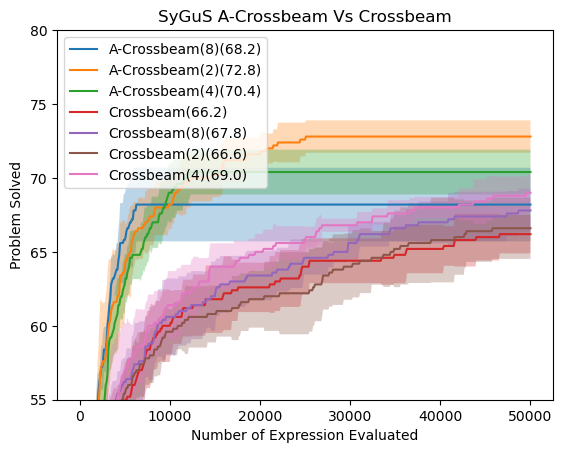

In [80]:
# plot df_merged_all and df_merged_new_all with evaluations as x-axis and avg as y-axis as a line plot wher the error is std
import matplotlib.pyplot as plt
for col in df_merged_all.columns:
    if col != 'evaluations':
        # if col has _avg  it is a avg column and we need to plot it with the corresponding _std column
        if col.split('_')[-1] == 'avg':
            # get the corresponding std column
            std_col = col.replace('avg', 'std')
            # plot the avg column with the corresponding std column
            # plt.errorbar(df_merged_all['evaluations'], df_merged_all[col], yerr=df_merged_all[std_col], label=col)
            # plt.plot(df_merged_all['evaluations'], df_merged_all[col], label=col)
            plt.fill_between(df_merged_all['evaluations'], df_merged_all[col] - df_merged_all[std_col], df_merged_all[col] + df_merged_all[std_col], alpha=0.3)
            plt.plot(df_merged_all['evaluations'], df_merged_all[col], label=(col.replace('_avg', '')).replace('CB_', '')+"(" + df_merged_all[col].iloc[-1].astype(str) + ")")
            # plt.text(df_merged_all['evaluations'].iloc[-1], df_merged_all[col].iloc[-1], df_merged_all[col].iloc[-1])
            
plt.legend()
plt.xlabel('Number of Expression Evaluated')
plt.ylabel('Problem Solved')
plt.ylim(55, 80)
plt.title('SyGuS A-Crossbeam Vs Crossbeam')
plt.savefig('./eval_data/SyGuS_' + filename + '_evaluations_statistics.pdf')
plt.show()
plt.close()

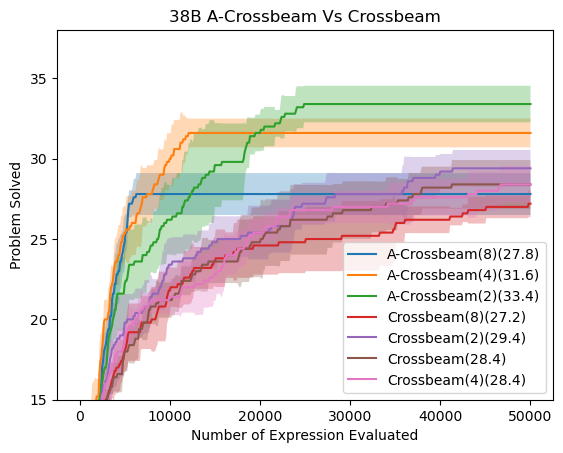

In [81]:
# plot for 38B
for col in df_merged_new_all.columns:
    if col != 'evaluations':
        # if col has _avg  it is a avg column and we need to plot it with the corresponding _std column
        if col.split('_')[-1] == 'avg':
            # get the corresponding std column
            std_col = col.replace('avg', 'std')
            # plot the avg column with the corresponding std column
            # plt.errorbar(df_merged_all['evaluations'], df_merged_all[col], yerr=df_merged_all[std_col], label=col)
            # plt.plot(df_merged_all['evaluations'], df_merged_all[col], label=col)
            plt.fill_between(df_merged_new_all['evaluations'], df_merged_new_all[col] - df_merged_new_all[std_col], df_merged_new_all[col] + df_merged_new_all[std_col], alpha=0.3)
            plt.plot(df_merged_new_all['evaluations'], df_merged_new_all[col], label=(col.replace('_avg', '')).replace('CB_', '')+"(" + df_merged_new_all[col].iloc[-1].astype(str) + ")")
            # plt.text(df_merged_new_all['evaluations'].iloc[-1], df_merged_new_all[col].iloc[-1], df_merged_new_all[col].iloc[-1])

plt.legend()
plt.xlabel('Number of Expression Evaluated')
plt.ylabel('Problem Solved')
plt.ylim(15, 38)
plt.title('38B A-Crossbeam Vs Crossbeam')
# save the plot as pdf
plt.savefig('./eval_data/38B_' + filename + '_evaluations_statistics.pdf')
plt.show()
plt.close()
